
<center>
<h1> Human  Activity Recognition </h1>

<h3> Sense Making And Insight Discovery</h3>

<br/>

<small>
<ul>
<li> Anand Rajan     </li>
<li> GU JIAHAO GAELAN  </li>
<li> Suma Mulpuru      </li>
<li> SUNIL PRAKASH	   </li>
</ul>
</small>
</center>

# Agenda



1.   Objective
2.   Problem Description
3.   Data Set
4.   Literature Survey
5.   Technological Approach
6.   Mock Innovation
7.   Experimental Results
8.   Performance Evaluation





# Objective




*   To make sense of data from modality sensors for robust human action recognition
*   To develop an algorithm to classify different human activities into categories using 
    data from single sensor or from fusion of multiple sensors




# Data Exploration

## Problem Description



- Human activity detection has several applications in many fields
- There are several different kinds of sensors available to address this task
- the use of multi modal sensors for human activity detection has increased these days
<img src="Images/Image1.jpg" style="float:right;z-index:-99"/>

- The data available is from four different modalities
- The human activities are to be classified using either one or all of the sensors data





## Dataset Explanation

- The available data set has four temporarily synchronized data modalities
<img src="Images/Image2.jpg" style="height:400px;float:right;z-index:-99"/>
- The modalities include:
    - RGB Videos
    - Depth Data
    - Skeletal Positions
    - Inertial Signals
- The data set is obtained from wearable sensors and Kinect
- Data is a comprehensive set of **27** human actions performed by 8 humans (4 males and  4 females)



# Literature Review



- Human Activity Recognition is a hot research topic as it has different applications in many fields
- Human activity is complex and dynamic and hence the algorithms should model nuances in human activities
- Each activity may have in turn several sub activities; eg. The activity of brushing teeth has sub activities of squeezing out the paste, bringing brush close to face etc.
- Hands play an important role in carrying out human activities
- Motion information is also important in classifying a human’s activities
- This task is accomplished by using different sensors like wearable sensors, vision based devices etc



- Wearable technology is a category of devices (sensors) that can be worn by the consumer and often include tracking information related to health and fitness
- They have diagnostic as well as monitoring applications
- Wearable inertial tracking is well accepted due to its convenience for free style motion tracking with high accuracy
- Wearable inertial tracking allows for unlimited estimation of limb orientations under fast motions which could improve the performance of motion capture evidently 
- The wearable inertial sensor used here is the low cost wireless inertial sensor
- Human soft tissue artifact is a main source of errors no matter the wearable is placed on the clothing or directly on the skin



- Kinect is an unobtrusive motion sensor device which is reliable, of competitive cost, powerful, easy to set up, use and accessible
<img src="Images/Image3.jpg" style="float:right;z-index:-99"/>

- With the use of depth  sensors like Kinect human activity recognition system using depth maps can be developed
- Kinect sensors are a good source of information as they are not effected by environmental light variations
- This device facilitates extraction of 3D points on human joints
- Action recognition has a wide range of application areas such as computer vision, robotics, machine learning, ambient intelligence, medical and many more commercial uses



- It is used for retrieving 3D information of a scene analyzing the depth map and skeletal joint information of the human body
<img src="Images/Image4.jpg" style="float:right;z-index:-99"/>
- This helps the Kinect sensor to identify the type of action being performed by the person such as standing, walking, punching, sitting, waving etc.
- Using the 3D joint information, the Kinect identifies the gestures and actions being performed by the human body and then the machine responds according to the action input
- If the human body is taken as a model set of joints connecting the relevant body parts, then the most significant configurations of its positions are used to define recurrent postures
- The activity recognition method should be able to guarantee an acceptable accuracy, real time processing, low power consumption which Kinect provides



- Skeleton streams are the most important features of a Kinect. 
- Its provide the position and location of the persons whether they tracked or not.
- The skeletons which are not tracked are given to zero value returned.
- Kinect follows the below steps to perform image acquisition:

    - Colour image frames extraction: Out of various resolutions available we have to obtained only 640x480 resolution images
    - Depth image frame extraction: It is also obtained at the resolutions of 640x480 images
    - Skeleton data used to track and extract the activity of user
    - Background subtraction 


# Technology Approach and Innovation


**Hidden Markov Model (HMM)**
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Hmm_temporal_bayesian_net.svg/500px-Hmm_temporal_bayesian_net.svg.png" style="float:right;z-index:-99"/>


- As Sequential data is different from normal snapshot data, composition of all sequences results to a particular action.

- Hidden Markov Models provide a more powerful framework as they allow the
states to be separated from the input without requiring a direct mapping.
- In HMM, the states are hidden and abstract while the inputs are observables

- The underlying stochastic process is not directly observable but can be observed
only through another set of stochastic processes that produce the sequence of
observations



# Classification - Individual Sensors

## Skeleton Sensor


- 20 joints positions in the world coordinate (i.e., x, y, and z) were recorded and the screen coordinates were mapped to the depth images 

<img src="https://raw.githubusercontent.com/sunilp/ca-open-resources/master/images/a1_skeleton.gif" style="width:250px;height:350px;float:right"/>



#### Activities Trained

1. *a1* - right arm swipe to the left,
2. *a2* - right arm swipe to the right,
3. *a3* - right hand wave




In [1]:
import numpy as np
from SensorHMM import SensorHMM
%matplotlib inline

In [0]:
skeleton_model = SensorHMM("skeleton",data_directory="Skeleton", data_key="d_skel",
                           no_features=20,n_components=4 )

In [0]:
all_data_skeleton = skeleton_model.load_data()

Data loaded  861


In [0]:
training_data, testing_data = skeleton_model.split_data(all_data_skeleton)

Done splitting 702 159


In [0]:
skeleton_model.fit(training_data,actions=actions)

training for  a1
(1560, 20)
ll 119659.163718
training for  a2
(1548, 20)
ll 120747.515238
training for  a3
(1679, 20)
ll 126619.041295
** training complete **


In [0]:
predictedY,predictedP = skeleton_model.predict(testing_data)
_,testY = zip(*[(testx,testy) for testx,testy in testing_data if testy in actions])

0.666666666667
             precision    recall  f1-score   support

         a1       1.00      0.67      0.80         6
         a2       0.50      0.83      0.62         6
         a3       0.75      0.50      0.60         6

avg / total       0.75      0.67      0.68        18

Confusion matrix, without normalization
[[4 2 0]
 [0 5 1]
 [0 3 3]]


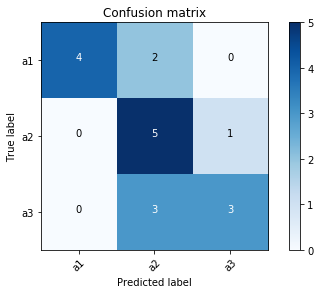

In [0]:
skeleton_model.print_classification_report(testY,predictedY)

## Inertial Sensor

* Inertial sensors usually provide information about **acceleration** and **rotation** in a 3D space

* In this case, the sensor was worn on either the right wrist or right thigh, and 3-axis acceleration and rotation signal data was collected in one channel
<img src="http://www.utdallas.edu/~cxc123730/UTD-MAD/sensor_placement.png" style="float:right;height:260px"/>
* It is worthwhile to note that since this is a low-cost 9-axis MEMS sensor, the data may not be highly accurate





### Data Preparation

In [13]:
cols = [0, 1, 2, 3, 4, 5, 'cat']
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
df_plot = pd.DataFrame(columns=cols)
filedir = './Inertial/'

for file in os.listdir(filedir):
    
    if file.endswith(".mat"):
        # import matlab file into df with label
        data = loadmat(filedir + file)
        df_plot1 = pd.DataFrame(data['d_iner'])

        subcat = str(file.split('_')[0] + '_' + file.split('_')[1] + '_' + file.split('_')[2])
        df_plot1['cat'] = subcat

        # append to original df
        df_plot = df_plot.append(df_plot1)

In [29]:
df_plot_a1 = df_plot[df_plot.cat == 'a1_s1_t1']
df_plot_a1.rename(columns={0: 'acc_X',
                           1: 'acc_Y', 
                           2: 'acc_Z',
                           3: 'gyro_X', 
                           4: 'gyro_Y', 
                           5: 'gyro_Z'}, inplace=True)

None



/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


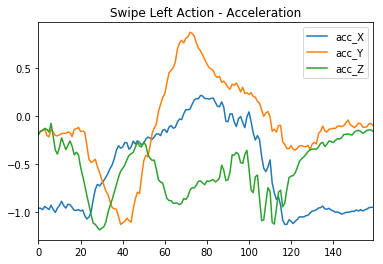

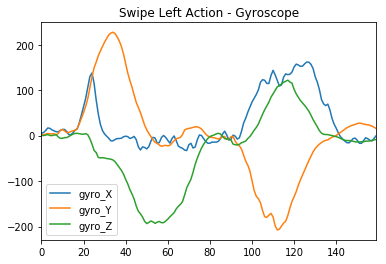

In [28]:
df_plot_a1.loc[:, 'acc_X':'acc_Z'].plot(title='Swipe Left Action - Acceleration')
df_plot_a1.loc[:, 'gyro_X':'gyro_Z'].plot(title='Swipe Left Action - Gyroscope')
plt.show()

In [2]:
inertial_model = SensorHMM("inertial",data_directory="Inertial", data_key="d_iner",
                           no_features=6,n_components=20 )

In [3]:
# data import
all_data_inertial = inertial_model.load_data()

Data loaded  861


In [4]:
# train-test split
training_data_inertial, testing_data_inertial = inertial_model.split_data(all_data_inertial)

Done splitting 702 159


### Training the Model

We train the Hidden Markov Model on the inertial data for the first 3 actions.

In [0]:
inertial_model.fit(training_data_inertial,actions=actions)

training for  a1
(4140, 6)


/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


ll -61110.4704711
training for  a2
(4125, 6)


/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


ll -61490.6449485
training for  a3
(4521, 6)


/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:460: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:469: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),
/usr/local/anaconda3/envs/nus/lib/python3.6/site-packages/hmmlearn/base.py:624: RuntimeWarning: divide by zero encountered in log
  np.log(self.transmat_),


ll -78711.9381161
** training complete **


### Classifying the Actions
<small>
Now we classify the actions using the trained inertial model on the test data of the 3 actions.
</small>

In [0]:
predictedY_inertial,predictedP_inertial = inertial_model.predict(testing_data_inertial)
_,testY_inertial = zip(*[(testx,testy) for testx,testy in testing_data_inertial if testy in actions])

0.944444444444
             precision    recall  f1-score   support

         a1       1.00      1.00      1.00         6
         a2       1.00      0.83      0.91         6
         a3       0.86      1.00      0.92         6

avg / total       0.95      0.94      0.94        18

Confusion matrix, without normalization
[[6 0 0]
 [0 5 1]
 [0 0 6]]


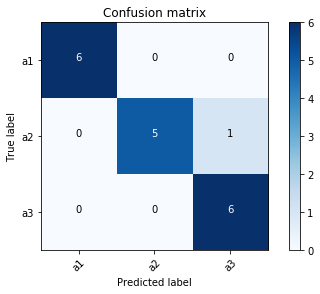

In [0]:
inertial_model.print_classification_report(testY_inertial,predictedY_inertial)

* A very favourable accuracy of 94% was achieved on the test data
* Only one misclassification when the *swipe right* (`a2`) action was mistaken for a *wave* (`a3`)
* This might be due to lesser data loss from the inertial sensor (as compared to the depth sensor) so the model is able to easily recognize and differentiate the actions

## Depth Sensor

<img src="Images/Image5.jpg" style="float:right;height:260px"/>



*  In the recent years, depth information is a particularly useful cue in human machine interface (HMI) applications.
*   The depth map-based methods rely mainly on features, either local or global, extracted from the feature space.
*   Compared to visual data, depth maps provide metric i.e measurements of the geometry that are invariant to lighting.
-   On the other hand, the main disadvantage of this technique is that depth sequences may be sensitive to occlusions 
    and the textures of the images are not as good as that of colour images.
-   At present, Gesture Recognition through visual and depth information is one of the main active research topics in the 
    computer vision community.  
-  In this approach we used three techniques such as
   *   Edge Detection using Sobel Feldman Algorithm
   *   Convolution using CNN
   *   Feature extraction
   *   Classifcation using Hidden Markov Model














### Data Preparation

In [0]:
depth_model = SensorHMM("depth",data_directory="Depth", data_key="d_depth",
                           no_features=19,n_components=4,params="f" )

In [0]:
all_data_depth = depth_model.load_data()
#depth_model.all_data=all_data_depth

Data loaded  861


In [0]:
training_data_depth, testing_data_depth = depth_model.split_data(all_data_depth)

Done splitting 702 159


### Training the Model

training for  a1
(22246, 19)
ll -3829983.50012
training for  a2
(21546, 19)
ll -4513741.30962
training for  a3
(23604, 19)
ll -2791556.52088
** training complete **


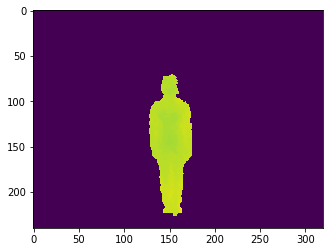

In [0]:
depth_model.fit(training_data_depth,actions=actions)

### Classifying the Actions

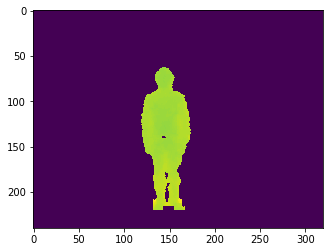

In [0]:
predictedY_depth,predictedP_depth = depth_model.predict(testing_data_depth)
_,testY_depth = zip(*[(testx,testy) for testx,testy in testing_data_depth if testy in actions])

### Model Metrics

0.666666666667
             precision    recall  f1-score   support

         a1       0.60      0.50      0.55         6
         a2       0.75      0.50      0.60         6
         a3       0.67      1.00      0.80         6

avg / total       0.67      0.67      0.65        18

Confusion matrix, without normalization
[[3 1 2]
 [2 3 1]
 [0 0 6]]


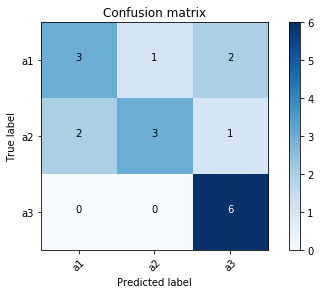

In [0]:
depth_model.print_classification_report(testY_depth,predictedY_depth)

# Fusion

# Future Research Considerations	

In order to realize the full potential of HAR (Human Activity Recognition) systems, certain topics like the one’s mentioned below need further investigation.

**Activity Recognition Data Set**: The quantitative comparison of HAR approaches has been hindered by the fact that each system works with a different dataset. In that direction, various datasets publicly open to the research community can be included which can be used as benchmarks to evaluate new approaches. 
 
**Concurrent and overlapping activities**: The assumption that an individual only performs one activity at a time is true for basic ambulation activities. In general, human activities are rather overlapping and concurrent. Since only few works have been reported in this area, we foresee great research opportunities in this field. 
 
**Crowd HAR**: The recognition of human activities has been somehow individualized, i.e., the majority of the systems predict activities in a single user. If we could gather activity patterns from a significant sample of people in certain area (e.g., a city, a state, or a country), that information could be used to estimate levels of sedentarism , exercise habits, and even health conditions in a target population. 
